# Scientific Programming in Python
**Winter Semester 2024/25**  

**Instructor:**  Krumnack, Ulf, Ph.D.

**Tutors:**

 - Görlich, Jonas

 - Bose, Krishnendu

 - Taghizadeh Motlagh, Seyed Arman

**Participant:** 

- Martin Enrique Iribarren

## Ethogram 2.0

### Preface


The concept of an ethogram can be defined in a single line, as stated by **Eibl-Eibesfeldt (1979):**

"*An ethogram is the exact catalog of all the behavioral forms typical of an animal*"

However, a more extensive description considers not only the classification of behaviors but also their underlying structure and function. In this regard, **Ferrari (2005)** expands the definition by integrating elements of semantic relationships, the role of the self, and the temporal dynamics of behavior:

"*An ethogram is a list of the forms of interaction of the subject with the environment (understanding that a grooming behavior is, ultimately, a way of relating, of preparing to relate to the environment). It is an analytical way of approaching behavior. It thus requires a subsequent synthesis movement to recompose that uninterrupted flow of actions. This synthesis movement can be carried out in different ways"*"


### 1. Introduction

This notebook presents a review of approaches at the intersection of ethology and machine learning methodologies.

To achieve this, I will refer to Hoffmann et al. work, *A Benchmark for Computational Analysis of Animal Behavior Using Animal-Borne Tags* (2024) The goal is to showcase the structure and types of data available and evaluate the suitability of different machine learning and deep learning techniques for behavior classification. This will help address the question of how and why these methodologies and protocols are essential for conducting an efficient and precise analysis of animal behavior.

This study does not aim to assess the hardware efficiency of different bio-loggers. Instead, by systematically reviewing the species studied, the structure and characteristics of the collected data, and the challenges encountered in behavioral annotation, this work seeks to provide a comprehensive explanation of the existing benchmark. The goal is to optimize the alignment between data properties and analytical methodologies, enabling a more effective selection of ecological data and behavioral signals. By considering machine learning techniques, sensor modalities, and species-specific movement dynamics, this approach ensures methodological rigor and enhances the ecological validity of computational ethology.

For a practical standpoint, in this notebook I will use as reference the **Human Behavior Dataset**, applying exploratory data analysis and machine learning techniques to extract insights on the data base.


# 2. General Data Analysis and Visualization

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import os

# Definir el path relativo al dataset
dataset_path = os.path.join("..", "dataset", "experiments_by_fold_behavior.csv")

# Upload Dataset
df = pd.read_csv(dataset_path)

#Data Cleaning

# Dictionary mapping original names to new names
mapping_names = {
    "HAR": "Humans",
    "baglione_crows": "Crows",
    "desantis_rattlesnakes": "Rattlesnakes",
    "friedlaender_whales": "Whales",
    "jeantet_turtles": "Turtles",
    "ladds_seals": "Seals",
    "maekawa_gulls": "Gulls",
    "pagano_bears": "Polar Bears",
    "vehkaoja_dogs": "Dogs"
}

# Replace the values in the 'dataset' column
df["dataset"] = df["dataset"].replace(mapping_names)


mapping_experiments = {
    "CRNN": "CRNN",
    "CNN": "CNN",
    "dt": "DT",
    "rf": "RF",
    "svm": "SVM",
    "wavelet_dt": "Wavelet DT",
    "wavelet_rf": "Wavelet RF",
    "wavelet_svm": "Wavelet SVM",
    "harnet_random_nogyr": "HarNet Random NoGyr",
    "harnet_unfrozen_nogyr": "HarNet Unfrozen NoGyr",
    "RNN_nogyr": "RNN",
    "CRNN_nogyr": "CRNN NoGyr",
    "rf_nogyr": "RF NoGyr",
    "harnet_low_data_nogyr": "HarNet Low Data NoGyr",
    "harnet_random_low_data_nogyr": "HarNet Random Low Data NoGyr",
    "harnet_unfrozen_low_data_nogyr": "HarNet Unfrozen Low Data NoGyr",
    "RNN_low_data_nogyr": "RNN Low Data NoGyr",
    "wavelet_RNN_low_data_nogyr": "Wavelet RNN Low Data NoGyr",
    "CRNN_low_data_nogyr": "CRNN Low Data NoGyr",
    "rf_low_data_nogyr": "RF Low Data NoGyr",
    "CRNN_low_data": "CRNN Low Data",
    "rf_low_data": "RF Low Data"
}

# Replace the values in the 'experiment' column
df["experiment"] = df["experiment"].replace(mapping_experiments)


mapping_behavior = {
    'LAYING': 'Lying',
    'SITTING': 'Sitting',
    'STANDING': 'Standing',
    'WALKING': 'Walking',
    'WALKING_DOWNSTAIRS': 'Walking Downstairs',
    'WALKING_UPSTAIRS': 'Walking Upstairs',
    'flying': 'Flying',
    'in_nest': 'In Nest',
    'Moving': 'Moving',
    'Not_Moving': 'Stationary',
    'exploratory': 'Exploring',
    'feed': 'Feeding',
    'rest': 'Resting',
    'travel': 'Traveling',
    'breathing': 'Breathing',
    'feeding': 'Feeding',
    'gliding': 'Gliding',
    'resting': 'Resting',
    'scratching': 'Scratching',
    'staying_at_surface': 'At Surface',
    'swimming': 'Swimming',
    'grooming': 'Grooming',
    'travelling': 'Traveling',
    'foraging': 'Foraging',
    'stationary': 'Stationary',
    'dig': 'Digging',
    'eat': 'Eating',
    'groom': 'Grooming',
    'head_shake': 'Head Shake',
    'pounce': 'Pouncing',
    'roll': 'Rolling',
    'run': 'Running',
    'swim': 'Swimming',
    'walk': 'Walking',
    'galloping': 'Galloping',
    'lying_chest': 'Lying Chest',
    'panting_lying_chest': 'Panting (Lying Chest)',
    'panting_sitting': 'Panting (Sitting)',
    'panting_standing': 'Panting (Standing)',
    'shaking': 'Shaking',
    'sitting': 'Sitting',
    'sniffing': 'Sniffing',
    'standing': 'Standing',
    'trotting': 'Trotting',
    'walking': 'Walking'
}

# Reemplazar en el dataset
df["behavior_class"] = df["behavior_class"].replace(mapping_behavior)

#Cleaning Columns
df_cleaned = df.drop(columns=['fig4', 'fig5d', 'fig5e'])

# Convert categorical columns to category type
df_cleaned['dataset'] = df_cleaned['dataset'].astype('category')
df_cleaned['dataset'] = df_cleaned['dataset'].astype('category')
df_cleaned['behavior_class'] = df_cleaned['behavior_class'].astype('category')
df_cleaned['experiment'] = df_cleaned['experiment'].astype('category')


# Display the cleaned dataset
df_cleaned.head()


,dataset,experiment,fold,behavior_class,f1,precision,recall,train_ground_truth_label_counts
0,Humans,harnet_nogyr,1,Lying,1.000000,1.000000,1.000000,109998
1,Humans,harnet_nogyr,1,Sitting,0.961396,0.994594,0.930343,102037
2,Humans,harnet_nogyr,1,Standing,0.968265,0.942418,0.995571,109989
3,Humans,harnet_nogyr,1,Walking,1.000000,1.000000,1.000000,98563
4,Humans,harnet_nogyr,1,Walking Downstairs,0.999783,0.999662,0.999904,87046


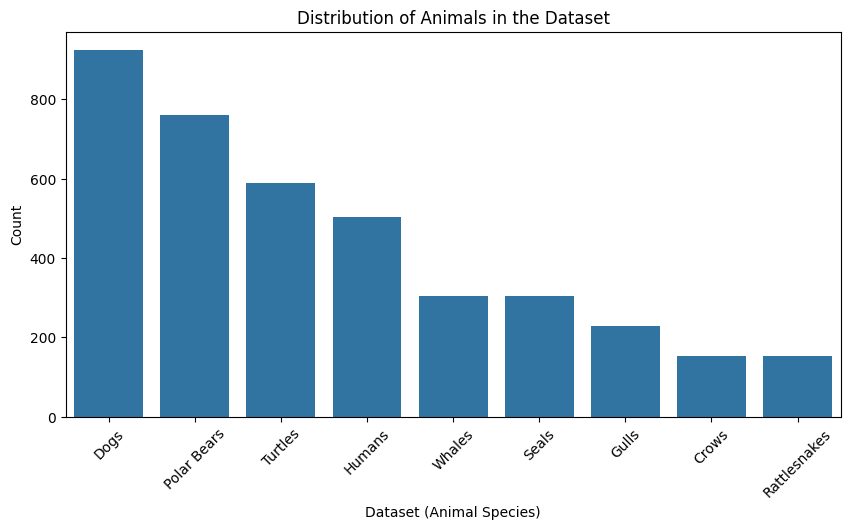

In [119]:
# Dataset Distribution (Animals)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='dataset', order=df_cleaned['dataset'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Animals in the Dataset")
plt.xlabel("Dataset (Animal Species)")
plt.ylabel("Count")
plt.show()


In [120]:
# Behavior Classes Distribution
behavior_counts = df_cleaned["behavior_class"].value_counts(normalize=True) * 100

# Convertir a lista de tuplas (nombre de la clase, porcentaje)
unique_behaviors = [(behavior, f"{perc:.2f}%") for behavior, perc in behavior_counts.items()]

# Mostrar la lista
for behavior, perc in unique_behaviors:
    print(f"{behavior}: {perc}")

Resting: 7.97%
Walking: 6.23%
Feeding: 6.03%
Sitting: 4.29%
Standing: 4.29%
Swimming: 4.09%
Grooming: 3.88%
Stationary: 3.88%
Traveling: 3.88%
Flying: 3.88%
At Surface: 2.15%
Shaking: 2.15%
Breathing: 2.15%
Panting (Standing): 2.15%
Galloping: 2.15%
Gliding: 2.15%
Panting (Sitting): 2.15%
Lying: 2.15%
Lying Chest: 2.15%
Walking Upstairs: 2.15%
Trotting: 2.15%
Walking Downstairs: 2.15%
Sniffing: 2.15%
Panting (Lying Chest): 2.15%
Scratching: 2.15%
Digging: 1.94%
Exploring: 1.94%
Moving: 1.94%
Head Shake: 1.94%
In Nest: 1.94%
Foraging: 1.94%
Eating: 1.94%
Rolling: 1.94%
Running: 1.94%
Pouncing: 1.94%


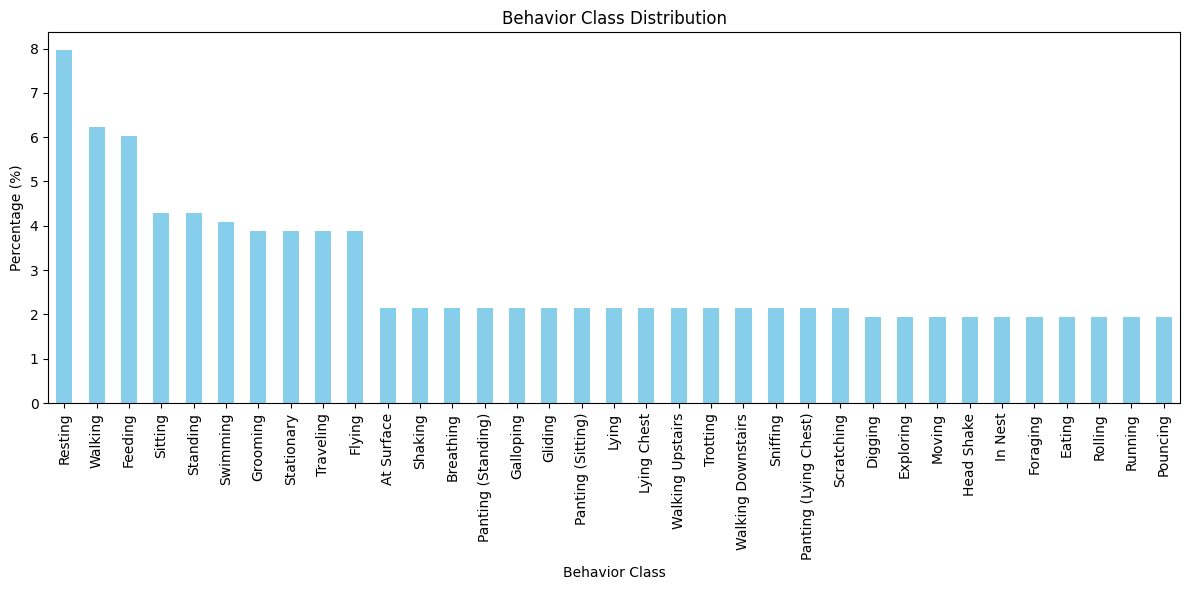

In [121]:
plt.figure(figsize=(12, 6))
behavior_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Behavior Class')
plt.ylabel('Percentage (%)')
plt.title('Behavior Class Distribution')
plt.tight_layout()
plt.show()

In [162]:
# Model Distribution 
experiment_counts = df["experiment"].value_counts(normalize=True) * 100

# Dataframe
df_experiment_distribution = pd.DataFrame({
    "Experiment": experiment_counts.index,
    "Percentage": experiment_counts.values
})

df_experiment_distribution["Percentage"] = df_experiment_distribution["Percentage"].map(lambda x: f"{x:.2f}%")

# Display 
display(df_experiment_distribution)

,Experiment,Percentage
0,harnet_nogyr,5.01%
1,CRNN,5.01%
2,CNN,5.01%
3,DT,5.01%
4,RF,5.01%
5,SVM,5.01%
6,Wavelet DT,5.01%
7,Wavelet RF,5.01%
8,Wavelet SVM,5.01%
9,HarNet Random NoGyr,5.01%


C:\Users\emart\AppData\Local\Temp\ipykernel_24456\2552285447.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_cleaned.groupby(["experiment", "dataset"])["f1"].mean().reset_index()


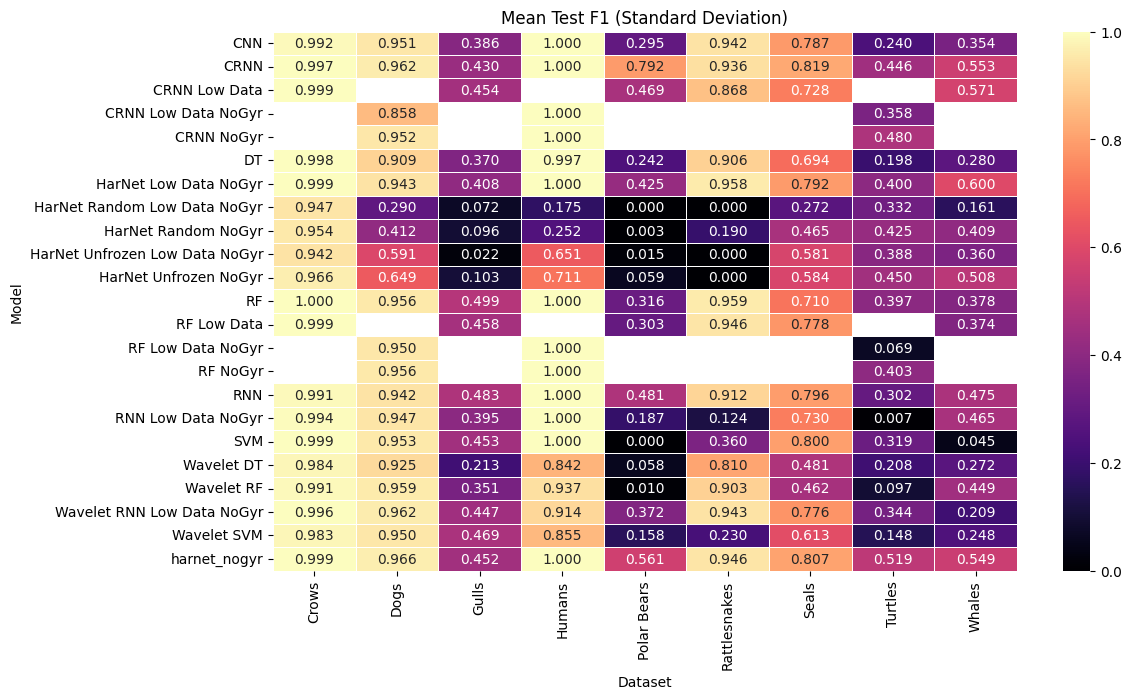

In [105]:
#Data Rearrange by Model Criteria

deep_learning_models = [
    "CRNN", "CNN", "RNN", "CRNN NoGyr", "RNN NoGyr", "CRNN Low Data", "RNN Low Data",
    "HarNet Random NoGyr", "HarNet Unfrozen NoGyr", "HarNet Low Data NoGyr",
    "HarNet Random Low Data NoGyr", "HarNet Unfrozen Low Data NoGyr",
    "Wavelet RNN Low Data NoGyr"
]

machine_learning_models = [
    "DT", "RF", "SVM", "Wavelet DT", "Wavelet RF", "Wavelet SVM",
    "RF NoGyr", "RF Low Data", "RF Low Data NoGyr"
]

# DL models appear first in the order
ordered_models = deep_learning_models + machine_learning_models

# Filter and reorder the DataFrame based on the ordered model list
existing_models = [model for model in ordered_models if model in df_pivoted.index]
df_pivoted = df_pivoted.loc[existing_models]

#Group the dataset by 'experiment' and 'dataset' and compute the mean F1 score
df_grouped = df_cleaned.groupby(["experiment", "dataset"])["f1"].mean().reset_index()
df_pivoted = df_grouped.pivot(index="experiment", columns="dataset", values="f1")

# Remove duplicate rows based on 'experiment' and 'dataset'
df_cleaned = df_cleaned.drop_duplicates(subset=["experiment", "dataset"])
df_pivoted = df_cleaned.pivot(index="experiment", columns="dataset", values="f1")

# Crear el heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df_pivoted, annot=True, fmt=".3f", cmap="magma", linewidths=0.5)

# Create the heatmap based on Figure 4 (Hoffmann, et al. 2024)
plt.title("Mean Test F1 (Standard Deviation)")
plt.xlabel("Dataset")
plt.ylabel("Model")

# Mostrar el gráfico
plt.show()


In the spirit of the analysis conducted in Figure 4 of Hoffmann et al. (2024), we observe that the datasets for Crows, Dogs, and Humans exhibit well-defined classes and high-quality data, making them highly valuable for the current benchmark. In contrast, the datasets for Gulls, Bears, Turtles, and Whales probably contains significant noise, complex analytical patterns, and consequently, difficulty in an accurate classification.

# 3. Selecting Dataset

## Based on the number of recorded behaviors in relation to the total

In [169]:
# Count the unique behavior classes per dataset
unique_behaviors_per_dataset = df_cleaned.groupby("dataset")["behavior_class"].nunique().reset_index()
unique_behaviors_per_dataset.rename(columns={"behavior_class": "unique_behaviors"}, inplace=True)

# Compute the total number of unique behavior classes across all datasets
total_unique_behaviors = df_cleaned["behavior_class"].nunique()

# Calculate the percentage of unique behaviors per dataset
unique_behaviors_per_dataset["percentage"] = (unique_behaviors_per_dataset["unique_behaviors"] / total_unique_behaviors) * 100

# Format values to two decimal places
unique_behaviors_per_dataset["percentage"] = unique_behaviors_per_dataset["percentage"].apply(lambda x: round(x, 2))

# Sort by percentage in descending order
unique_behaviors_per_dataset = unique_behaviors_per_dataset.sort_values(by="percentage", ascending=False)

# Display the table
display(unique_behaviors_per_dataset)


C:\Users\emart\AppData\Local\Temp\ipykernel_24456\2107686973.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_behaviors_per_dataset = df_cleaned.groupby("dataset")["behavior_class"].nunique().reset_index()


,dataset,unique_behaviors,percentage
1,Dogs,11,31.43
4,Polar Bears,10,28.57
7,Turtles,7,20.00
3,Humans,6,17.14
8,Whales,4,11.43
6,Seals,4,11.43
2,Gulls,3,8.57
0,Crows,2,5.71
5,Rattlesnakes,2,5.71


F1 Scores Comparison per Model:


dataset,Humans,Dogs,Turtles,Whales,Polar Bears
experiment,,,,,
CNN,1.000000,0.951049,0.239966,0.353898,0.294847
CRNN,1.000000,0.962032,0.445616,0.553152,0.792050
CRNN Low Data,NaN,NaN,NaN,0.570952,0.468597
CRNN Low Data NoGyr,1.000000,0.857543,0.358386,NaN,NaN
CRNN NoGyr,1.000000,0.951643,0.479927,NaN,NaN
DT,0.997185,0.909234,0.198247,0.279984,0.242274
HarNet Low Data NoGyr,1.000000,0.943273,0.400370,0.600004,0.424587
HarNet Random Low Data NoGyr,0.175228,0.290340,0.331854,0.161220,0.000000
HarNet Random NoGyr,0.251866,0.411508,0.425470,0.408944,0.002822


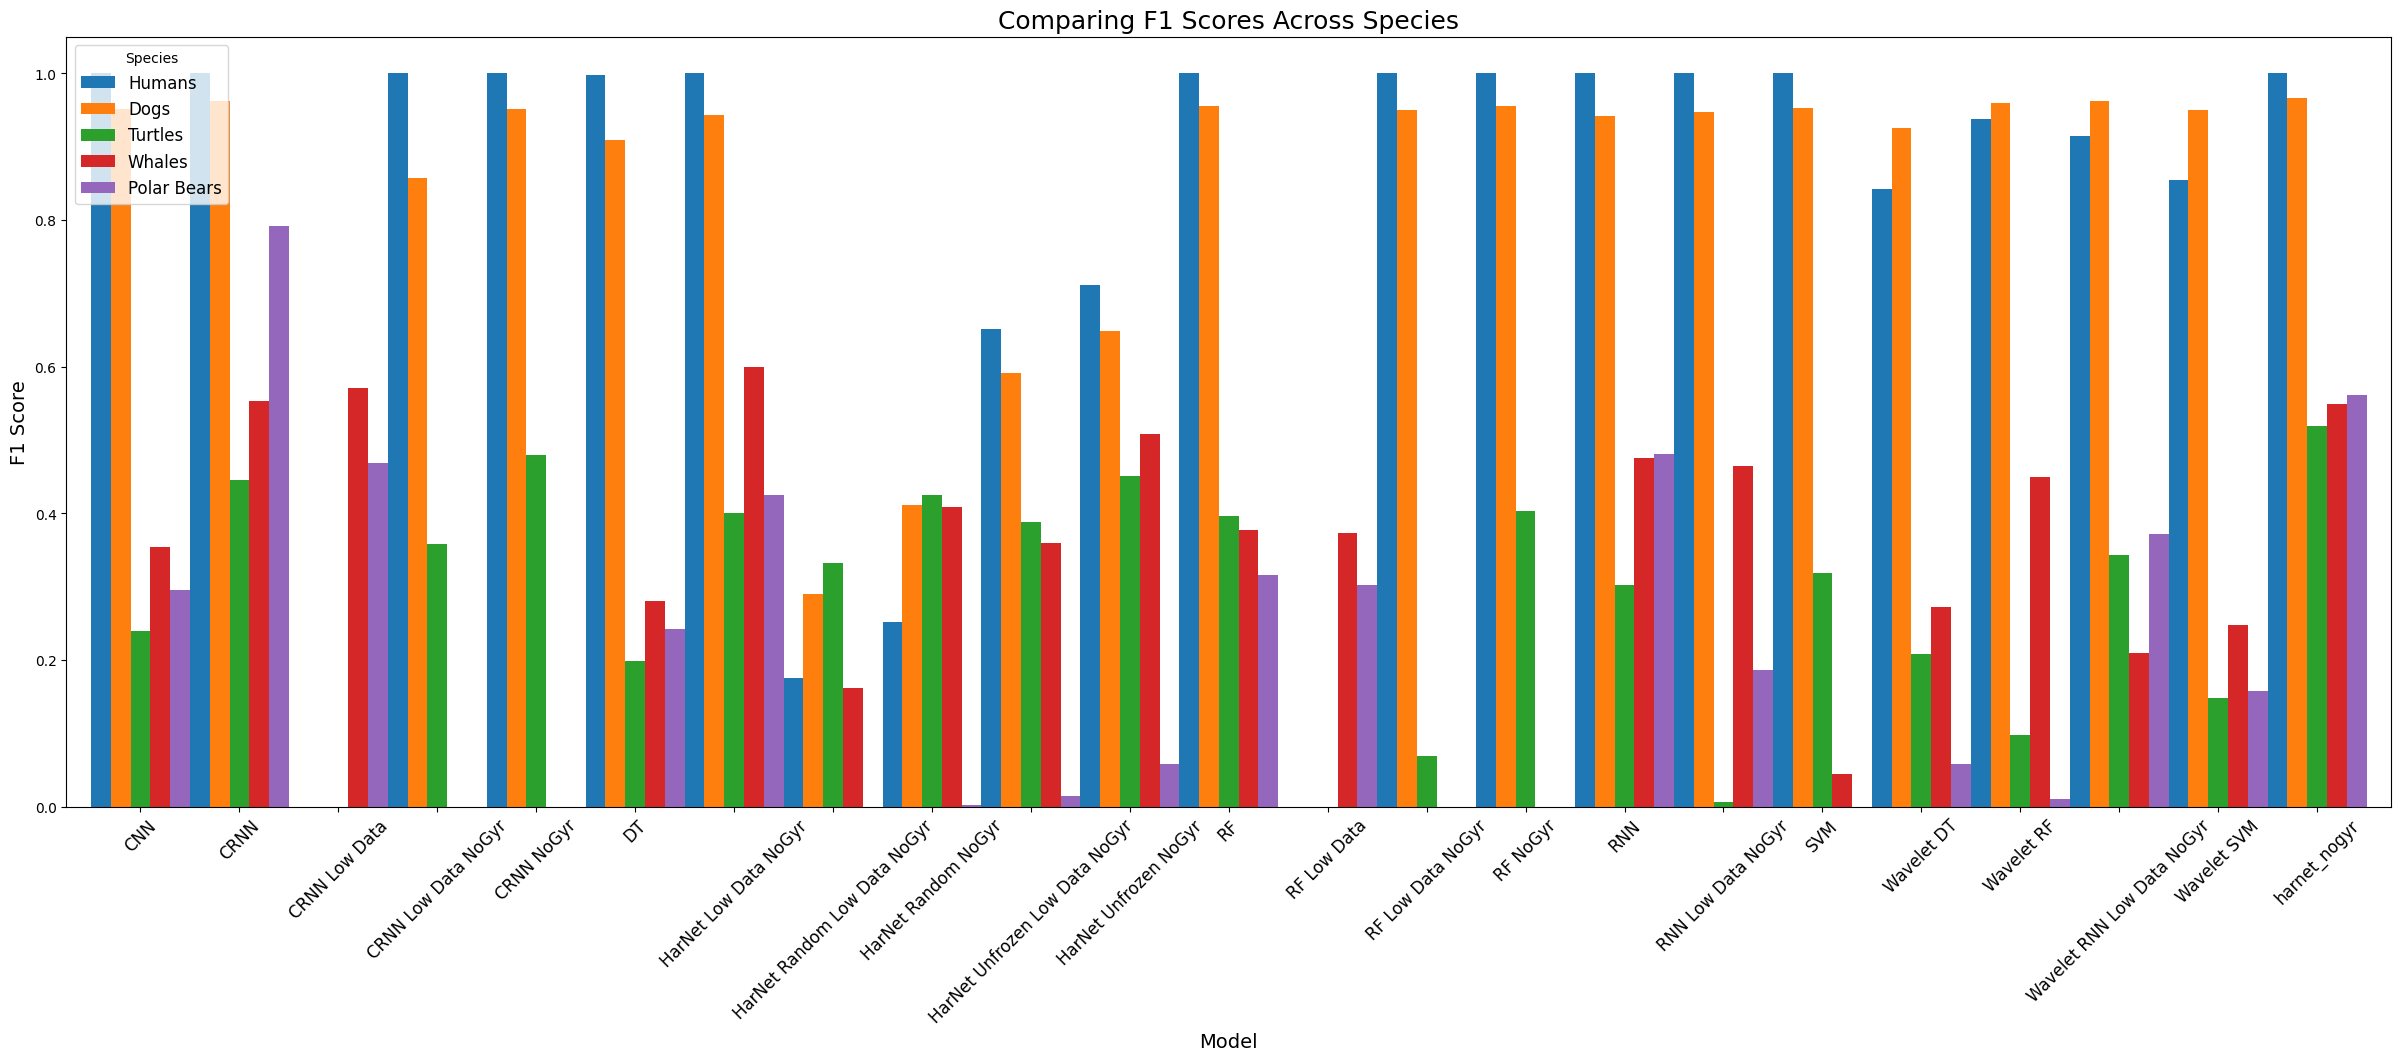

In [175]:
import matplotlib.pyplot as plt

# Selected species to compare
selected_species = ["Dogs", "Polar Bears", "Turtles", "Humans", "Whales"]

# Species in df_pivoted
available_species = list(set(selected_species) & set(df_pivoted.columns))

# Filter the dataset 
df_subset = df_pivoted[available_species].copy()

# Table with F1 scores
print("F1 Scores Comparison per Model:")
display(df_subset)

# Bar chart
df_subset.plot(kind='bar', figsize=(30, 10), width=1)

plt.title("Comparing F1 Scores Across Species", fontsize = 18)
plt.xlabel("Model", fontsize=14)
plt.ylabel("F1 Score", fontsize= 14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Species", loc='upper left', fontsize= 12)

plt.show()


In the bar chart above, we observe the F1 scores for Dogs, Polar Bears, Turtles, Humans, and Whales, highlighting clear performance differences across species. Dogs and Humans consistently achieve the highest F1 scores across various models, while Turtles, Whales, and Polar Bears show lower and more variable performance. 

We are likely encountering a higher number of recorded data points, though not necessarily a greater quality or variety of behaviors. While the dog is the only domestic animal present in the datasets, we should also consider the different environments in which these species move. Both dogs and humans are limited to terrestrial movement, whereas other species include aerial, aquatic, or hybrid movement patterns, which significantly alter the way data is collected.

**Bibliography:**

- Anderson, D. J., & Perona, P. (2014). Toward a Science of Computational Ethology. Neuron, 84(1), 18–31. https://doi.org/10.1016/j.neuron.2014.09.005


- Bohnslav, J. P., Wimalasena, N. K., Clausing, K. J., Dai, Y. Y., Yarmolinsky, D. A., Cruz, T., Kashlan, A. D., Chiappe, M. E., Orefice, L. L., Woolf, C. J., & Harvey, C. D. (2021). DeepEthogram, a machine learning pipeline for supervised behavior classification from raw pixels. eLife, 10, e63377. https://doi.org/10.7554/eLife.63377

- Fazzari, E., Romano, D., Falchi, F., & Stefanini, C. (2024). Animal behavior analysis methods using deep learning: A survey. arXiv preprint arXiv:2405.14002. http://arxiv.org/abs/2405.14002

- Ferrari, H. R. (2002). Sobre el etograma, 1: del etograma como lenguaje al lenguaje de los etogramas. Revista de Etología, 4(2), 3–14.

- Ferrari, H. R., Lahitte, H. B., & Lázaro, L. C. (2005). Etogramática: Teoría y práctica de la descripción en ciencias del comportamiento. Editorial Nobuko.

- Hoffman, B. et. al (2024). A benchmark for computational analysis of animal behavior, using animal-borne tags. Movement Ecology, 12(1), 78. https://doi.org/10.1186/s40462-024-00511-8


- Lorenz, K. (1981). The Foundations of Ethology. Springer-Verlag.

- Tinbergen, N. (1963). On aims and methods of ethology. Zeitschrift für Tierpsychologie, 20, 410–433. https://doi.org/10.1111/j.1439-0310.1963.tb01161.x